# 🟦 主成分分析（PCA）とはなにか？

主成分分析（Principal Component Analysis, PCA）は、多次元データに含まれる情報をできるだけ保ったまま、次元数を削減するための手法である。  
ここでいう「情報」とは分散の大きさを指し、PCAはデータのばらつきが最も大きくなる方向を新しい軸（主成分）として定義する。

PCAでは以下を行っている。

- 各次元の相関を考慮する
- 分散が最大になる方向を第1主成分として選ぶ
- それに直交し、次に分散が大きい方向を第2主成分とする
- **重要度の低い（分散の小さい）方向を捨てることで次元を削減する**

この処理は、元の座標系を回転させ、新しい軸にデータを射影する操作と考えることができる。



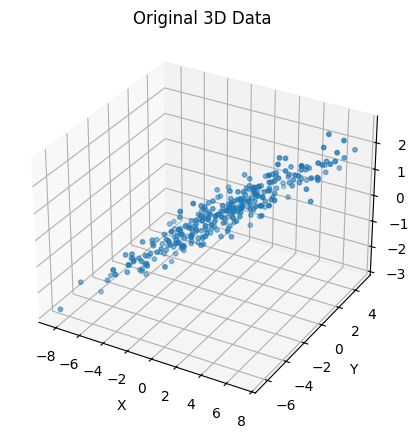

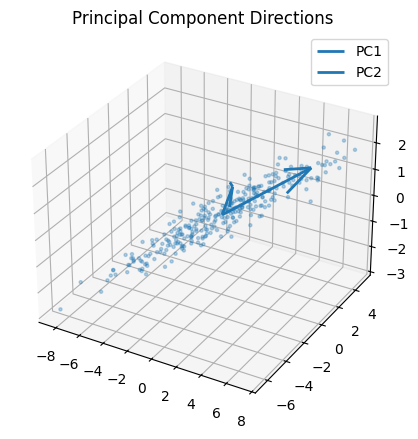

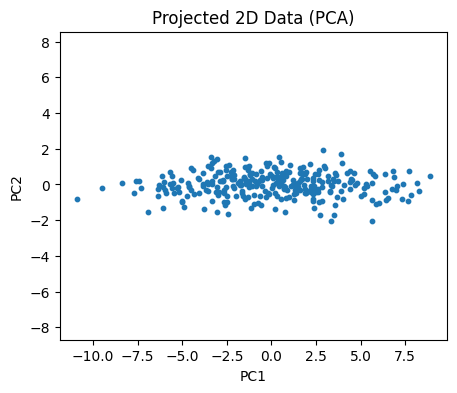

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # noqa

# =========================
# 1. 相関をもたせた3次元データ作成
# =========================
np.random.seed(0)
n = 300

# 主に x 方向に分散が伸びるように設計
x = np.random.normal(0, 3.0, n)
y = 0.6 * x + np.random.normal(0, 0.8, n)
z = 0.3 * x + np.random.normal(0, 0.4, n)

X = np.column_stack([x, y, z])

# =========================
# 2. 元の3次元データを可視化
# =========================
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Original 3D Data")
plt.show()

# =========================
# 3. PCA（3次元 → 2次元）
# =========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 主成分ベクトル（元の3次元空間での方向）
components = pca.components_

# =========================
# 4. 主成分方向を3次元空間に描画
# =========================
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=5, alpha=0.3)

origin = X.mean(axis=0)
for i, vec in enumerate(components):
    ax.quiver(
        origin[0], origin[1], origin[2],
        vec[0], vec[1], vec[2],
        length=6,
        linewidth=2,
        label=f"PC{i+1}"
    )

ax.set_title("Principal Component Directions")
ax.legend()
plt.show()

# =========================
# 5. 2次元に射影された結果
# =========================
plt.figure(figsize=(5, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projected 2D Data (PCA)")
plt.axis("equal")
plt.show()



# 🟦 どういうサンプルデータをどのように次元を削減したか

サンプルデータは3次元で、意図的に相関を持たせて作成している。

- x は大きな分散を持つ主な変動要因
- y と z は x に比例する成分を含み、x と相関を持つ
- ノイズを加えることで完全な直線にはならないようにしている

この結果、データ全体は3次元空間の中で、ある斜め方向に細長く分布する。

次元削減では以下を行っている。

- 3次元データにPCAを適用
- 分散が最も大きい方向（第1主成分）と、次に大きい方向（第2主成分）を残す
- 分散が最も小さい方向（第3主成分）を捨てる
- 3次元 → 2次元へ射影する

これにより、データの形状をほぼ保ったまま2次元で表現できる。


# 🟦 各図が表しているもの

1. 元の3次元データの散布図  
   相関を持つ3次元データが、斜め方向に伸びた雲状に分布している様子を示している。

2. 主成分方向を重ねた3次元図  
   データの中心から伸びる矢印が主成分ベクトルを表している。  
   第1主成分は最も分散が大きい方向を指し、第2主成分はそれに直交する次に重要な方向を指す。

3. PCA後の2次元散布図  
   主成分軸に射影された結果を示している。  
   元の3次元構造が、情報を大きく失うことなく2次元に潰されていることが分かる。


# 🟦 理解しておくべき関数

### 🟠 numpy

- numpy.random.normal  
  正規分布に従う乱数を生成し、分散やノイズを制御するために使っている。

- numpy.column_stack  
  複数の1次元配列を列としてまとめ、2次元配列（データ行列）を作る。

- numpy.mean  
  データの中心（平均）を求め、主成分ベクトルを描画する際の基準点として使っている。

### 🟠 scikit-learn

- sklearn.decomposition.PCA  
  主成分分析を行うクラス。

- fit  
  データから主成分の方向（固有ベクトル）と分散を学習する。

- transform  
  学習した主成分軸にデータを射影する。

- fit_transform  
  fit と transform をまとめて行う。

- components_  
  各主成分の方向ベクトル。元の特徴空間での軸の向きを表す。

### 🟠 matplotlib

- scatter  
  散布図を描画する。

- quiver  
  ベクトル（主成分方向）を矢印として描画する。

- set_xlabel / set_ylabel / set_zlabel  
  各軸のラベルを設定する。

- axis("equal")  
  軸のスケールを揃え、歪みのない表示にする。